# Homework 4: Parallel and Distributed computing with Dask

# Task 0. Housekeeping

## Homework 4 completed by Ahsan Ahmad

# Section D

## Task 1. Install and Imports

In [5]:
import os
import dask
from dask.distributed import Client
import dask.dataframe as dd
import pandas as pd
import glob
from sklearn.model_selection import GridSearchCV

## Task 2. Get the data and read it in

In [3]:
filename = os.path.join('nycflights','*.csv')
filename

'nycflights\\*.csv'

In [4]:
# Read the CSV files using Dask
ddf = dd.read_csv(filename)

In [5]:
pdf = pd.concat(map(pd.read_csv, glob.glob(filename)))

## Task 3. Lazy operations

In [6]:
ddf.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


## Task 4. Timing exercise

In [7]:
# Using %timeit to time a single line of code and see which is faster Dask operation or pandas
%timeit ddf = dd.read_csv(filename)

101 μs ± 4.77 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
# Using %timeit to time a single line of code and see which is faster Dask operation or pandas
%timeit pdf = pd.concat(map(pd.read_csv, glob.glob('nycflights/*.csv')))

7 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Task 5. DataFrame attributes

In [9]:
ddf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [10]:
ddf.dtypes

Year                           int64
Month                          int64
DayofMonth                     int64
DayOfWeek                      int64
DepTime                      float64
CRSDepTime                     int64
ArrTime                      float64
CRSArrTime                     int64
UniqueCarrier        string[pyarrow]
FlightNum                      int64
TailNum                      float64
ActualElapsedTime            float64
CRSElapsedTime                 int64
AirTime                      float64
ArrDelay                     float64
DepDelay                     float64
Origin               string[pyarrow]
Dest                 string[pyarrow]
Distance                     float64
TaxiIn                       float64
TaxiOut                      float64
Cancelled                      int64
Diverted                       int64
dtype: object

## Task 6. Read in the data again

In [12]:
# Changing the datatypes of certain columns
ddf = dd.read_csv(filename, 
                 dtype={'CRSElapsedTime': 'float64',
                        'TailNum': 'object'})

ddf['Date'] = dd.to_datetime(ddf.pop('Year').astype(str) + '-' + 
                             ddf.pop('Month').astype(str) + '-' + 
                             ddf.pop('DayofMonth').astype(str),
                                format="%Y-%m-%d")

ddf['Date'].head()

0   1990-01-01
1   1990-01-02
2   1990-01-03
3   1990-01-04
4   1990-01-05
Name: Date, dtype: datetime64[ns]

In [13]:
# getting the column names
ddf.columns

Index(['DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'Date'],
      dtype='object')

In [14]:
# re-arranging the columns
ddf = ddf[['Date','DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted']]

# verifying that a new Date column is added in the first index
ddf.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,0,0


In [15]:
len(ddf)

2611892

In [16]:
# Verifying that the dtypes are set correctly
ddf[['CRSElapsedTime', 'TailNum']].sample(frac=0.001).compute()

,CRSElapsedTime,TailNum
16956,90.0,NaN
154051,77.0,NaN
124743,144.0,NaN
214963,72.0,NaN
197214,214.0,NaN
...,...,...
73649,136.0,N439UA
38782,61.0,N491DA
120236,160.0,N937MC
80192,343.0,N626AW


## Task 7. Obtaining a Dask Series and indexing Dask DataFrames

In [18]:
# Selecting a single column to obtain a Dask Series object
ddf['TailNum'].compute()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
269176    N516UA
269177    N504UA
269178    N592UA
269179    N575UA
269180    N539UA
Name: TailNum, Length: 2611892, dtype: object

In [19]:
# Indexing using .loc
ddf.loc[ddf['ArrTime'] < ddf['ArrTime'].mean()].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
88,1990-01-01,1,1205.0,1110,1343.0,1243,US,49,NaN,98.0,...,NaN,60.0,55.0,LGA,CLE,418.0,NaN,NaN,0,0
89,1990-01-02,2,1158.0,1110,1327.0,1243,US,49,NaN,89.0,...,NaN,44.0,48.0,LGA,CLE,418.0,NaN,NaN,0,0
90,1990-01-03,3,1202.0,1110,1324.0,1243,US,49,NaN,82.0,...,NaN,41.0,52.0,LGA,CLE,418.0,NaN,NaN,0,0
91,1990-01-06,6,1126.0,1110,1322.0,1243,US,49,NaN,116.0,...,NaN,39.0,16.0,LGA,CLE,418.0,NaN,NaN,0,0
92,1990-01-07,7,1114.0,1110,1236.0,1243,US,49,NaN,82.0,...,NaN,-7.0,4.0,LGA,CLE,418.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269146,1999-12-27,1,1102.0,1100,1305.0,1311,UA,1685,N515UA,243.0,...,208.0,-6.0,2.0,LGA,DEN,1619.0,10.0,25.0,0,0
269147,1999-12-28,2,1058.0,1100,1305.0,1311,UA,1685,N598UA,247.0,...,221.0,-6.0,-2.0,LGA,DEN,1619.0,6.0,20.0,0,0
269148,1999-12-29,3,1057.0,1100,1308.0,1311,UA,1685,N517UA,251.0,...,218.0,-3.0,-3.0,LGA,DEN,1619.0,5.0,28.0,0,0
269149,1999-12-30,4,1056.0,1100,1312.0,1311,UA,1685,N502UA,256.0,...,227.0,1.0,-4.0,LGA,DEN,1619.0,6.0,23.0,0,0


In [20]:
# Indexing using .iloc, must select all rows
ddf.iloc[:, [1,3,]].compute()

,DayOfWeek,CRSDepTime
0,1,1540
1,2,1540
2,3,1540
3,4,1540
4,5,1540
...,...,...
269176,1,1645
269177,2,1645
269178,3,1645
269179,4,1645


## Task 8. Converting from Pandas to Dask

In [21]:
# Converting Pandas DataFrame to Dask DataFrame
ddf_partitions = dd.from_pandas(pdf, npartitions = 10)
ddf_partitions.partitions[1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,
26119,int64,int64,int64,int64,float64,int64,float64,int64,string,int64,string,float64,float64,float64,float64,float64,string,string,float64,float64,float64,int64,int64
52238,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Task 9. Computations on Dask DataFrames

### Task 9a. Calculate the number of non-missing values in each column

In [23]:
non_missing = ddf.count().compute()
non_missing

Date                 2611892
DayOfWeek            2611892
DepTime              2540961
CRSDepTime           2611892
ArrTime              2533682
CRSArrTime           2611892
UniqueCarrier        2611892
FlightNum            2611892
TailNum              1298886
ActualElapsedTime    2533682
CRSElapsedTime       2609927
AirTime              1255069
ArrDelay             2533682
DepDelay             2540961
Origin               2611892
Dest                 2611892
Distance             2610397
TaxiIn               1298886
TaxiOut              1298886
Cancelled            2611892
Diverted             2611892
dtype: int64

### Task 9b. Calculate the counts of each of the categorical values in the Cancelled column

In [24]:
count_cancelled = ddf['Cancelled'].value_counts().compute()
count_cancelled

Cancelled
1      70931
0    2540961
Name: count, dtype: int64

### Task 9c. Calculate the max value of the DepDelay column

In [25]:
DepDelay_max = ddf['DepDelay'].max().compute()
DepDelay_max

1435.0

### Task 9d. Find and print the columns for all the rows where the flights are Cancelled

In [27]:
Cancelled_flights = ddf[ddf['Cancelled'] == 1].compute()
Cancelled_flights

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
37,1990-01-08,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
55,1990-01-29,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
61,1990-01-04,4,NaN,1850,NaN,1948,US,42,NaN,NaN,...,NaN,NaN,NaN,EWR,SYR,194.0,NaN,NaN,1,0
207,1990-01-01,1,NaN,645,NaN,850,US,93,NaN,NaN,...,NaN,NaN,NaN,LGA,IND,659.0,NaN,NaN,1,0
259,1990-01-25,4,NaN,1755,NaN,1942,US,105,NaN,NaN,...,NaN,NaN,NaN,JFK,PIT,340.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1999-12-20,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,...,NaN,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,1,0
269031,1999-12-16,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269093,1999-12-14,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269153,1999-12-17,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0


### Task 9e. How many observations are there where the DayOfWeek column equals 1? The answer /output should be a single int

In [31]:
DayOfWeek_Obs = len(ddf[ddf['DayOfWeek'] == 1].compute())
DayOfWeek_Obs

388011

### Task 9f. How many non-cancelled flights were taken from each Origin airport?

In [44]:
Non_canc_flights_Ori = ddf[ddf['Cancelled'] == 0].groupby('Origin').size().compute()
Non_canc_flights_Ori

Origin
EWR    1139451
JFK     427243
LGA     974267
dtype: int64

### Task 9f. BONUS Compute the ratio of non-cancelled to total flights (for that origin) for each Origin.

In [45]:
# Creating a new series with the number of total flights for each origin using value_counts()
Total_flights_Ori = ddf['Origin'].value_counts().compute()
Total_flights_Ori

Origin
EWR    1174131
JFK     434341
LGA    1003420
Name: count, dtype: int64

In [46]:
# Ratio of non-cancelled to total flights for each origin
ratio_non_canc = (Non_canc_flights_Ori / Total_flights_Ori)
ratio_non_canc

Origin
EWR    0.970463
JFK    0.983658
LGA    0.970946
dtype: float64

### Task 9g. Calculate the average departure delay for each Origin airport by DayOfWeek

In [52]:
Ave_DepDelay_Ori = ddf.groupby(['Origin','DayOfWeek'])['DepDelay'].mean().compute()
Ave_DepDelay_Ori

Origin  DayOfWeek
EWR     1             9.115922
        2             9.179402
        3            10.606154
        4            12.069740
        5            13.154202
        6             8.053139
        7             9.432185
JFK     1             8.884113
        2             8.841036
        3             9.448858
        4            10.846967
        5            12.339922
        6            11.191893
        7            10.947545
LGA     1             6.580465
        2             6.659778
        3             7.311600
        4             8.620151
        5             9.151866
        6             5.800159
        7             7.589457
Name: DepDelay, dtype: float64

### Task 9h. For each of the three NYC airports as the Destination, compute means of all numeric columns.

In [71]:
nyc_airports = ['EWR','JFK','LGA']
Mean_NY_Dest_Air = ddf[ddf['Dest'].isin(nyc_airports)].groupby('Dest').mean(numeric_only = True).compute()
Mean_NY_Dest_Air

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Dest,,,,,,,,,,,,,,,,
EWR,3.838710,1216.100000,885.483871,1068.833333,845.612903,559.225806,45.166667,32.233333,27.777778,34.583333,23.766667,19.064516,7.111111,23.666667,0.032258,0.193548
LGA,4.625000,1313.500000,795.000000,1164.833333,821.375000,2310.500000,37.500000,31.125000,8.800000,25.500000,37.000000,14.750000,7.200000,18.400000,0.000000,0.250000
JFK,5.166667,1652.166667,1679.833333,1765.000000,1731.666667,1009.666667,59.500000,30.166667,19.500000,114.166667,84.833333,17.666667,7.000000,18.500000,0.000000,0.000000


### Task 9i. For each year, compute the maximum values of ActualElapsedTime and Distance.

In [78]:
Max_AET_Dist = ddf.groupby(ddf['Date'].dt.year)[['ActualElapsedTime','Distance']].max().compute()
Max_AET_Dist

,ActualElapsedTime,Distance
Date,,
1990,595.0,2586.0
1991,632.0,2586.0
1992,703.0,2586.0
1993,675.0,2586.0
1994,647.0,2586.0
1995,581.0,2586.0
1996,620.0,2586.0
1997,587.0,2586.0
1998,743.0,4962.0


## Task 10. Visualizing Dask Task Graphs

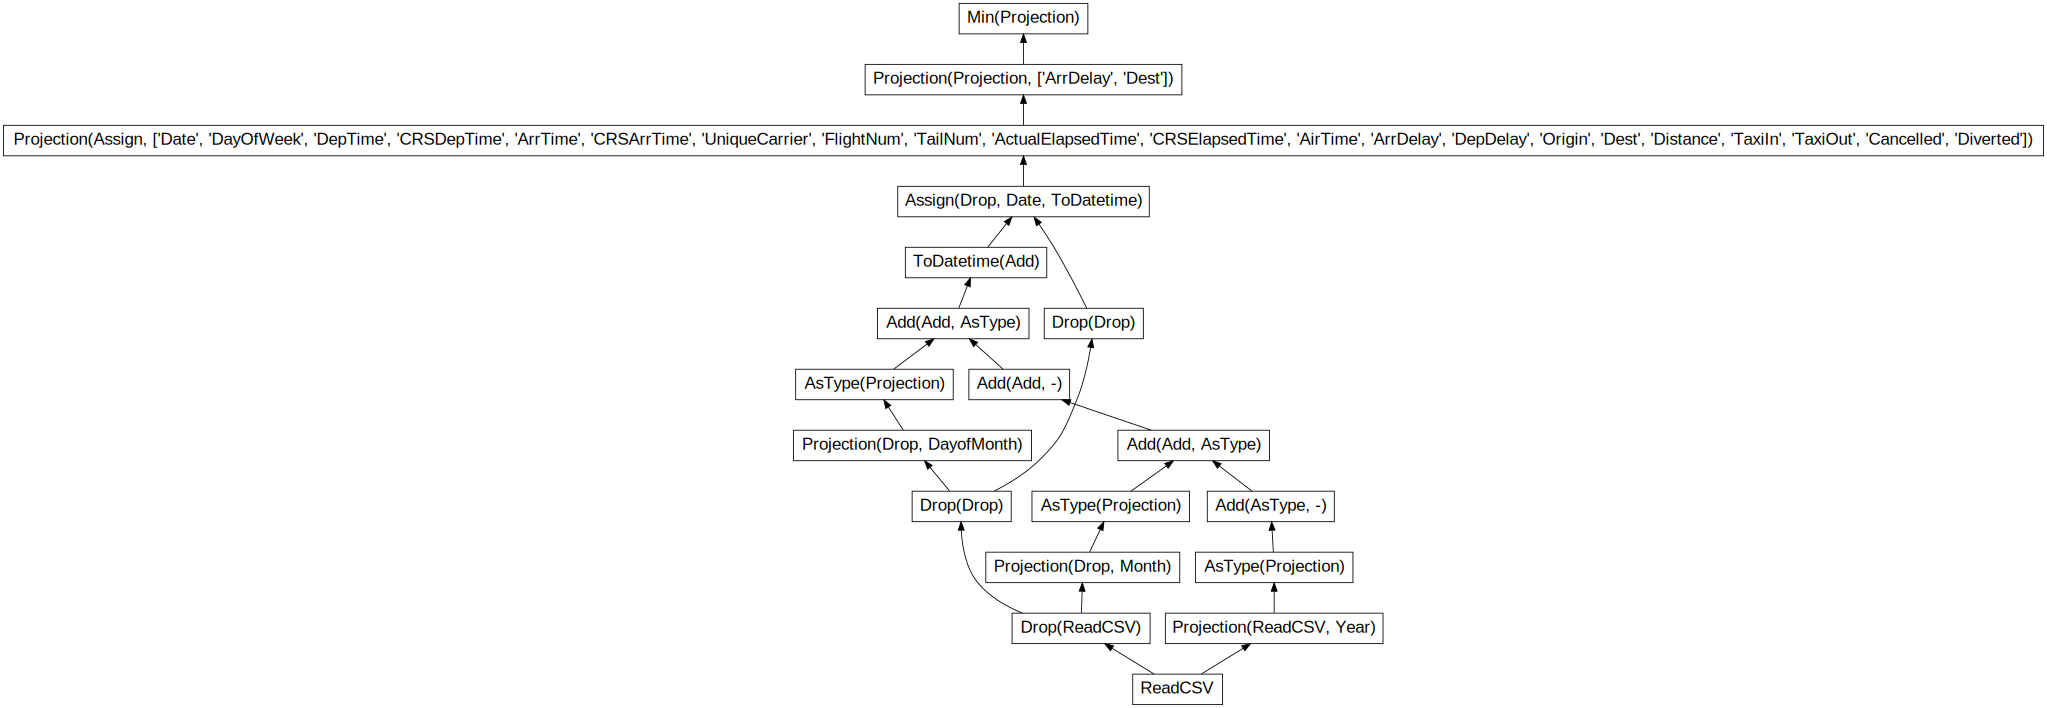

In [79]:
ddf.groupby('Dest')["ArrDelay"].min().visualize()

## Task 11. Use Distributed Task Scheduler: Set up a cluster and ProgressBar for diagnostics

In [11]:
from dask.distributed import Client

client = Client()

print(client)

<Client: 'tcp://127.0.0.1:56499' processes=5 threads=20, memory=31.68 GiB>


In [81]:
ddf.groupby("Dest")["ArrDelay"].min().compute()

Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

In [82]:
from dask.diagnostics import ProgressBar
ProgressBar().register()

## Task 12. Using a different scheduler for specific tasks

In [6]:
x = ddf.groupby("Dest")["ArrDelay"].min()

x.compute(scheduler = 'threads')

Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

In [7]:
with dask.config.set(scheduler = 'processes'):
    print(x.compute())

Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64


# Section E. MACHINE LEARNING WITH DASK 

## Task 13. Generate random data

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=4, random_state=0)

X[:8]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-1.90879217, -1.1602627 , -0.27364545, -0.82766028],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 1.68616989,  1.6329131 , -1.42072654,  1.04050557],
       [-0.93912893, -1.02270838,  1.10093827, -0.63714432]])

In [9]:
y[:8]

array([0, 0, 1, 0, 0, 0, 0, 1])

## Task 14. Fit a SupportVector Classifier

In [4]:
# Importing svm model
from sklearn.svm import SVC

estimator = SVC(random_state = 42)
estimator.fit(X,y)


SVC(random_state=42)

In [11]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [13]:
estimator.support_vectors_[:5]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 0.06135861, -0.32391974,  0.99651845, -0.15720499]])

In [14]:
estimator.score(X, y)

0.905

## Task 15. Setting Hyperparameters

In [16]:
# Changing the default hyperparamters for our SVM model
estimator = SVC(C = 0.00001, shrinking = False, random_state = 0)
estimator.fit(X, y)
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976]])

In [17]:
# Checking the mean classification accuracy again with the new model
estimator.score(X, y)

0.5007

## Task 16. Applying GridSearchCV on a single core

In [19]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining an SVC estimator
estimator = SVC(gamma = 'auto', probability = True, random_state = 42)

# Specifying a parameter grid as a dict of hyperparameters
param_grid = {
    'C' : [0.001, 10.0],
    'kernel' : ['rbf', 'poly', 'linear'],
}

# Doing grid search for the SVC model using GridSearchCV
grid_search = GridSearchCV(estimator, param_grid, verbose = 2, cv = 2)

# Timing this cell/operation
%time grid_search.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ................................C=0.001, kernel=rbf; total time=  16.2s
[CV] END ................................C=0.001, kernel=rbf; total time=  15.5s
[CV] END ...............................C=0.001, kernel=poly; total time=   6.9s
[CV] END ...............................C=0.001, kernel=poly; total time=   7.3s
[CV] END .............................C=0.001, kernel=linear; total time=   5.4s
[CV] END .............................C=0.001, kernel=linear; total time=   5.1s
[CV] END .................................C=10.0, kernel=rbf; total time=   4.2s
[CV] END .................................C=10.0, kernel=rbf; total time=   3.9s
[CV] END ................................C=10.0, kernel=poly; total time=   6.1s
[CV] END ................................C=10.0, kernel=poly; total time=   5.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.5s
[CV] END ..............................C=10.0, ke

GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

## Task 17. Applying GridSearchCV on multi-cores (native Scikit parallelism using joblib)

In [20]:
# Checking number of cores in my machine
n_cpu =os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 20


In [21]:
# Running the GridSearchCV function again but on multiple cores now (parrallelism using joblib)
grid_search_MC = GridSearchCV(estimator,
                             param_grid,
                             verbose = 2,
                             cv = 2,
                             n_jobs = -1)

# Timing the operation
%time grid_search_MC.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
CPU times: total: 11.5 s
Wall time: 21.5 s


GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [26]:
# Viewing the tuned best hyperparameters
grid_search_MC.best_params_

{'C': 10.0, 'kernel': 'rbf'}

In [27]:
# Viewing the tuned best score
grid_search_MC.best_score_

0.9086000000000001

## Task 18. Parallelism with Dask (can use single or multi-machine)

In [9]:
# Importing joblib module
import joblib

# Setting up hyperparameter grid
param_grid = {
    'C' : [0.001, 0.1, 1.0, 2.5, 5., 10.0, 100., 500., 1000.],
    'kernel' : ['rbf', 'poly', 'linear'],
    'shrinking' : [True, False],
}

# Setting up a new GridSearchCV object with n_jobs = -1
grid_search_Dist = GridSearchCV(estimator,
                               param_grid,
                               verbose = 2,
                               cv = 5,
                               n_jobs = -1)


In [12]:
%%time

with joblib.parallel_backend("dask"):
    grid_search_Dist.fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 49.8 s
Wall time: 19min 29s


In [13]:
# Viewing all the grid search results as a dataframe
pd.DataFrame(grid_search_Dist.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.689619,0.560038,1.944713,0.195185,0.001,rbf,True,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': True}",0.8485,0.8205,0.8330,0.8235,0.8295,0.8310,0.009788,33
1,3.569500,0.188259,2.195257,0.426700,0.001,rbf,False,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': False}",0.8485,0.8205,0.8325,0.8235,0.8295,0.8309,0.009769,34
2,2.589374,0.351171,0.429591,0.109560,0.001,poly,True,"{'C': 0.001, 'kernel': 'poly', 'shrinking': True}",0.7960,0.7660,0.7745,0.7780,0.7830,0.7795,0.009940,53
3,2.151041,0.174488,0.491123,0.182750,0.001,poly,False,"{'C': 0.001, 'kernel': 'poly', 'shrinking': Fa...",0.7960,0.7660,0.7745,0.7780,0.7830,0.7795,0.009940,53
4,2.120371,0.324029,0.233035,0.025744,0.001,linear,True,"{'C': 0.001, 'kernel': 'linear', 'shrinking': ...",0.8390,0.8130,0.8260,0.8120,0.8205,0.8221,0.009881,51


In [14]:
# Viewing the tuned best hyperparameters
grid_search_Dist.best_params_

{'C': 1000.0, 'kernel': 'rbf', 'shrinking': True}

In [15]:
# Viewing the tuned best score
grid_search_Dist.best_score_

0.9138

In [16]:
# Computing predictions and saving them in y_pred
y_pred = grid_search_Dist.predict(X)

In [17]:
# Obtaining common classification statistics
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4993
           1       0.88      0.96      0.92      5007

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Task 19. Close the Client

In [18]:
client.shutdown()